In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from datetime import datetime 
from tensorflow import keras


In [33]:
data = pd.read_csv('all_stocks_5yr.csv')

In [34]:
data.head(20)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [35]:
data.shape

(619040, 7)

In [37]:
data['date'] = pd.to_datetime(data['date']) 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


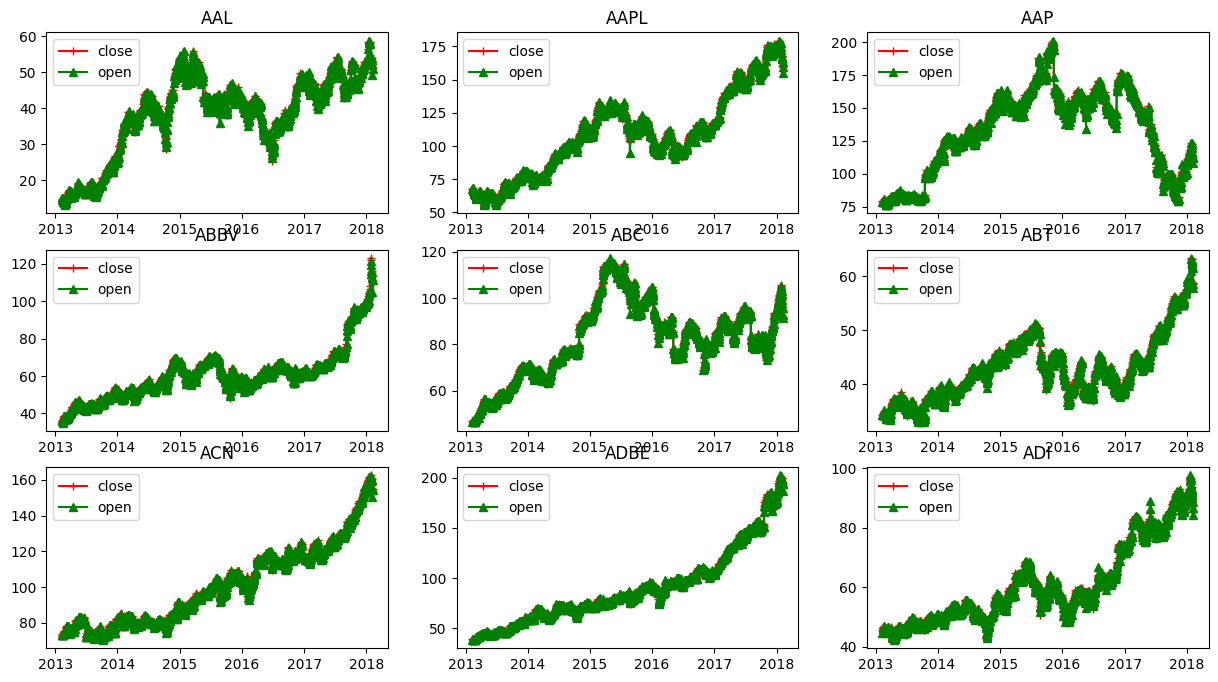

In [38]:
try:
    companies = data['Name'].unique()
    num_companies = len(companies)
    num_rows = (num_companies - 1) // 3 + 1 
    plt.figure(figsize=(15, 8)) 
    for index, company in enumerate(companies, 1): 
        plt.subplot(3, 3, index)  
        c = data[data['Name'] == company] 
        plt.plot(c['date'], c['close'], c="r", label="close", marker="+") 
        plt.plot(c['date'], c['open'], c="g", label="open", marker="^") 
        plt.title(company) 
        plt.legend() 

    plt.tight_layout()
    plt.show()
except ValueError:
    pass  # Ignore the ValueError and continue execution

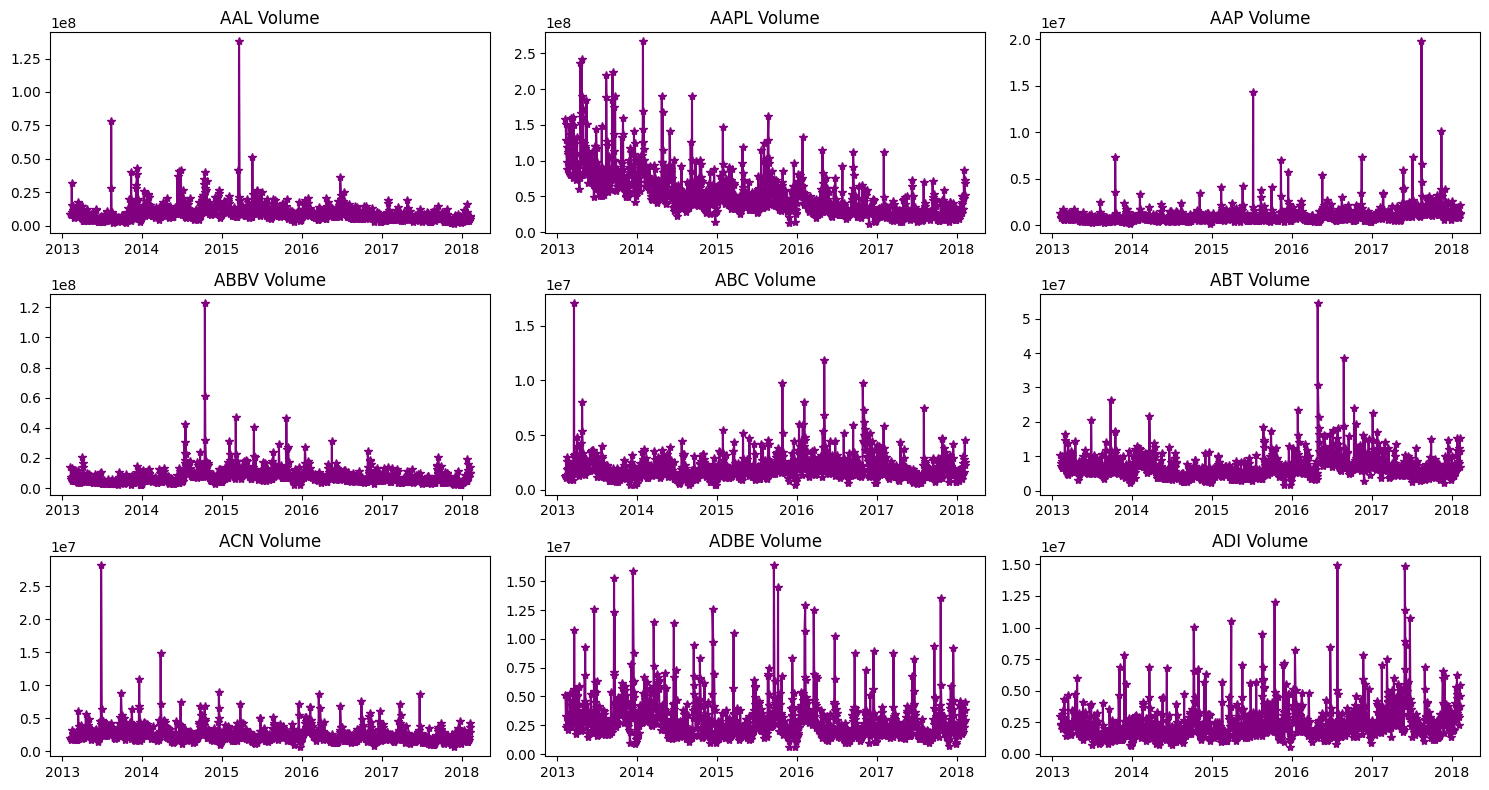

In [39]:
import matplotlib.pyplot as plt

try:
    plt.figure(figsize=(15, 8)) 
    for index, company in enumerate(companies, 1): 
        plt.subplot(3, 3, index) 
        c = data[data['Name'] == company] 
        plt.plot(c['date'], c['volume'], c='purple', marker='*') 
        plt.title(f"{company} Volume") 
        plt.tight_layout() 

    plt.show()
except:
    pass  

In [40]:
def variation_of_companyX_and_predict_thefuturevalue(company_name,company_temp,company_heading):
    company_temp = data[data['Name'] == company_name]
    prediction_range = company_temp.loc[(company_temp['date'] > datetime(2013,1,1))
    & (company_temp['date']<datetime(2018,1,1))]
    plt.plot(company_temp['date'],company_temp['close']) 
    plt.xlabel("Date") 
    plt.ylabel("Close") 
    plt.title(company_heading) 
    plt.show()
    # return company_temp
    #print the datapoints
    close_data = company_temp.filter(['close'])
    dataset = close_data.values
    training = int(np.ceil(len(dataset) * .95))
    print("Training Datapoint : ",training)

    #Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1)) 
    scaled_data = scaler.fit_transform(dataset) 
    train_data = scaled_data[0:int(training), :] 

    x_train = [] 
    y_train = [] 

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0]) 
    
    x_train, y_train = np.array(x_train), np.array(y_train) 
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    ##making model 

    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(units=64, 
							return_sequences=True, 
							input_shape=(x_train.shape[1], 1))) 
    model.add(keras.layers.LSTM(units=64)) 
    model.add(keras.layers.Dense(32)) 
    model.add(keras.layers.Dropout(0.5)) 
    model.add(keras.layers.Dense(1)) 
    # model.summary 

    #runing epoch

    model.compile(optimizer='adam', 
			loss='mean_squared_error') 
    history = model.fit(x_train, 
					y_train, 
					epochs=40) 



    # from these epoch we test our data 
    test_data = scaled_data[training - 60:, :] 
    x_test = []
    y_test = dataset[training:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    mse = np.mean(np.power((predictions - y_test), 2))
    print("Mean Squared Error : ",mse)
    print("Root Mean Squared Error : ",np.sqrt(mse))

    # training loss
    train_loss = model.evaluate(x_train,y_train)
    print("Training Loss:", train_loss)

    # Plot training loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    train = company_temp[:training] 
    test = company_temp[training:] 
    test['Predictions'] = predictions 

    plt.figure(figsize=(10, 8)) 
    plt.plot(train['date'], train['close']) 
    plt.plot(test['date'], test[['close', 'Predictions']]) 
    plt.title(company_heading) 
    plt.xlabel('date') 
    plt.ylabel("Close") 
    plt.legend(['Train', 'Test', 'Predictions']) 

  

### APPLE STOCK PRICE

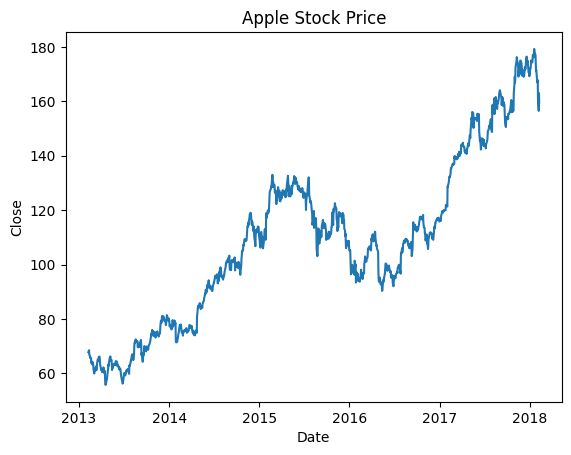

Training Datapoint :  1197
Epoch 1/40


/Users/swayampalrecha/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0560
Epoch 2/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0112
Epoch 3/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0095
Epoch 4/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0086
Epoch 5/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0069
Epoch 6/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0072
Epoch 7/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0076
Epoch 8/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0062
Epoch 9/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0065
Epoch 10/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0064
Epoch 11/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0062
Epoch 12/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0065
Epoch 13/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0054
Epoch 14/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0052
Epoch 15/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0049
Epoch 16/40
36/

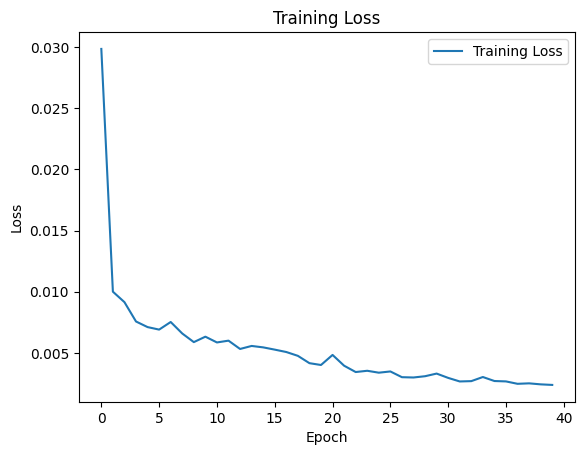

/var/folders/kp/l89ywx516b3blj23_q2zm_p80000gn/T/ipykernel_49047/4045915862.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


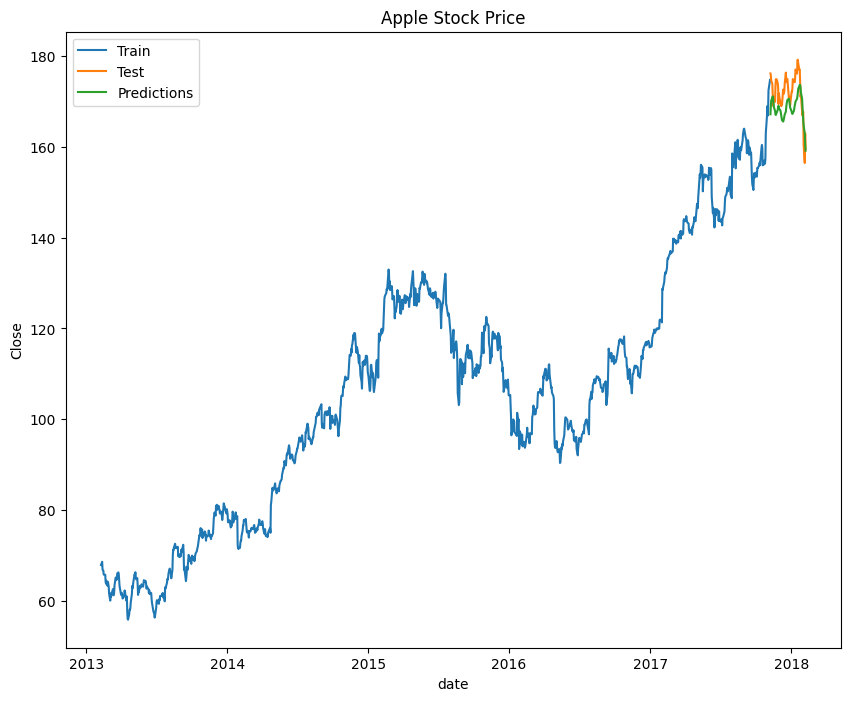

In [41]:
variation_of_companyX_and_predict_thefuturevalue('AAPL',data,'Apple Stock Price') 

### GOOGLE STOCK PRICE

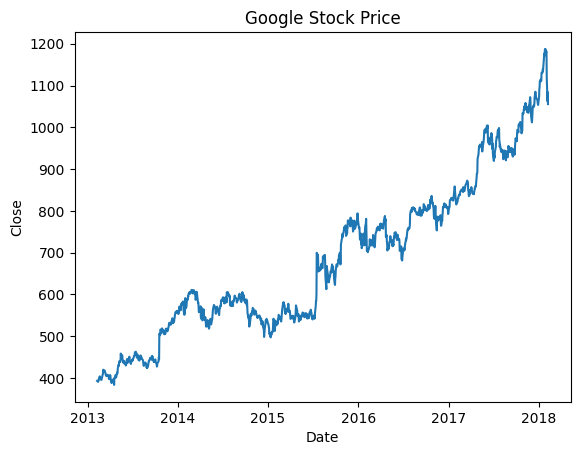

Training Datapoint :  1197
Epoch 1/40


/Users/swayampalrecha/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0574
Epoch 2/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0093
Epoch 3/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0073
Epoch 4/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0055
Epoch 5/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0068
Epoch 6/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0052
Epoch 7/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0058
Epoch 8/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0059
Epoch 9/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0052
Epoch 10/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0044
Epoch 11/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0050
Epoch 12/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0046
Epoch 13/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0041
Epoch 14/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0042
Epoch 15/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0049
Epoch 16/40
36/

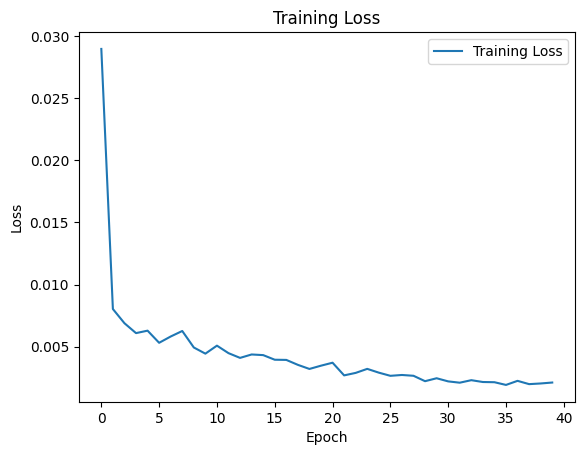

/var/folders/kp/l89ywx516b3blj23_q2zm_p80000gn/T/ipykernel_49047/4045915862.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


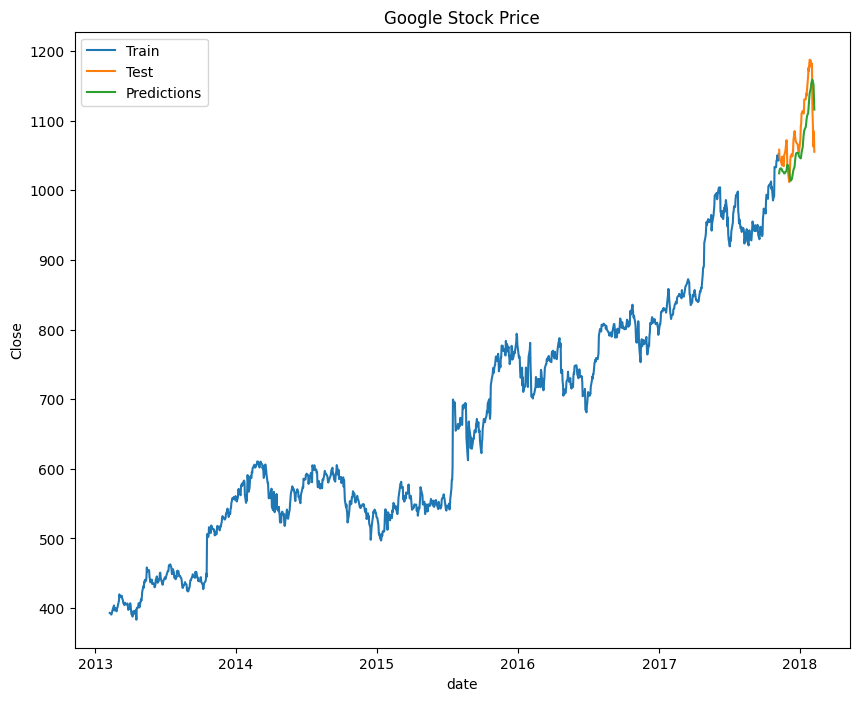

In [42]:
variation_of_companyX_and_predict_thefuturevalue('GOOGL',data,'Google Stock Price')

### AMAZON STOCK PRICE

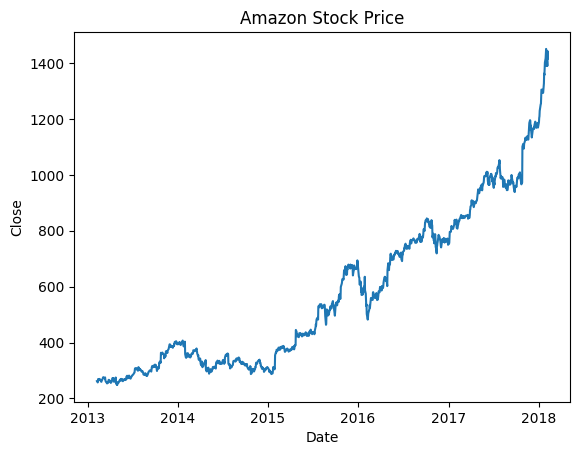

Training Datapoint :  1197
Epoch 1/40


/Users/swayampalrecha/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0206
Epoch 2/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0043
Epoch 3/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0041
Epoch 4/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0037
Epoch 5/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0040
Epoch 6/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0036
Epoch 7/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0033
Epoch 8/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0028
Epoch 9/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0031
Epoch 10/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0025
Epoch 11/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0032
Epoch 12/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0028
Epoch 13/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0024
Epoch 14/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0020
Epoch 15/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0021
Epoch 16/40
36/

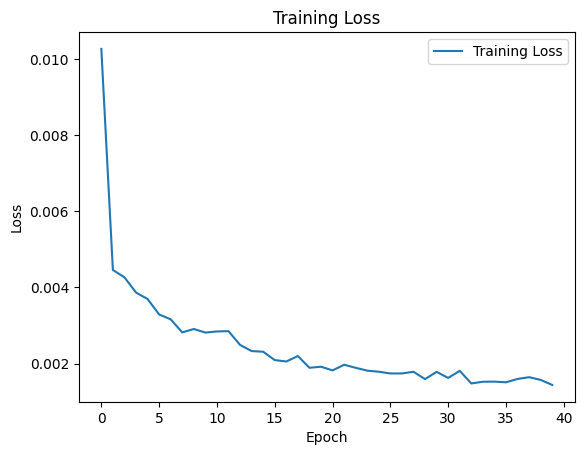

/var/folders/kp/l89ywx516b3blj23_q2zm_p80000gn/T/ipykernel_49047/4045915862.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


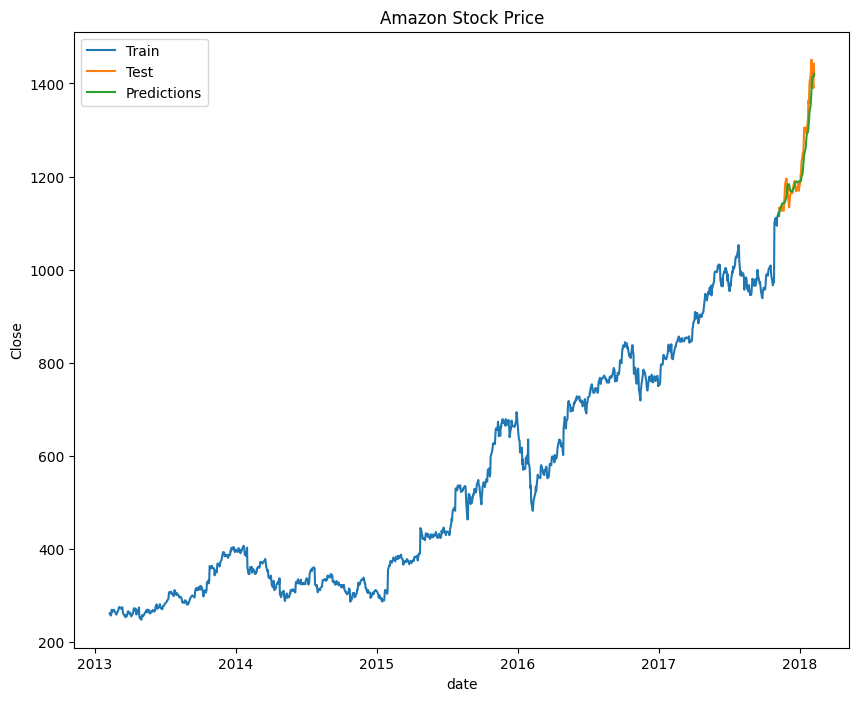

In [43]:
variation_of_companyX_and_predict_thefuturevalue('AMZN',data,'Amazon Stock Price')

### MICROSOFT STOCK PRICE

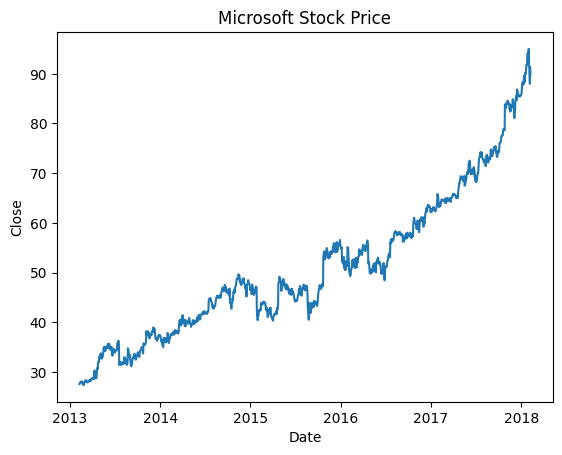

Training Datapoint :  1197
Epoch 1/40


/Users/swayampalrecha/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0509
Epoch 2/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0062
Epoch 3/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0059
Epoch 4/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0055
Epoch 5/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0067
Epoch 6/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0039
Epoch 7/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0047
Epoch 8/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0042
Epoch 9/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0043
Epoch 10/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0035
Epoch 11/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0040
Epoch 12/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0033
Epoch 13/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0041
Epoch 14/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0036
Epoch 15/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0033
Epoch 16/40
36/

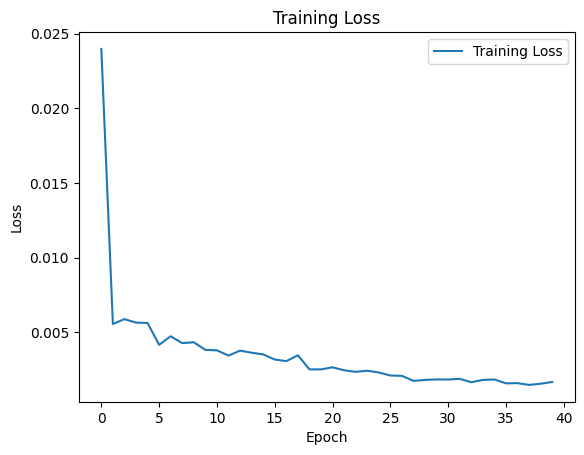

/var/folders/kp/l89ywx516b3blj23_q2zm_p80000gn/T/ipykernel_49047/4045915862.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


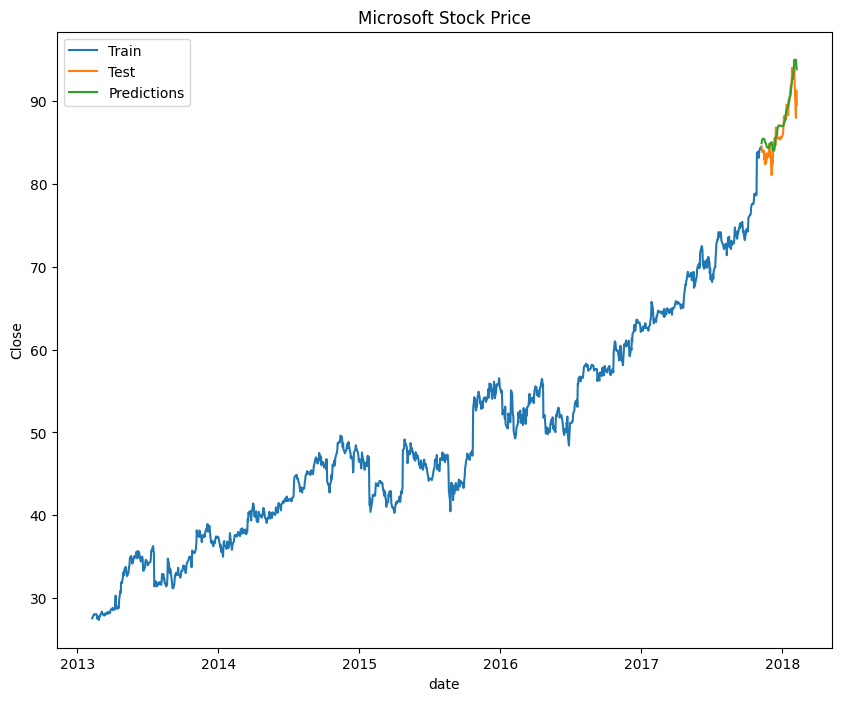

In [44]:
variation_of_companyX_and_predict_thefuturevalue('MSFT',data,'Microsoft Stock Price')

### FACEBOOK STOCK PRICE

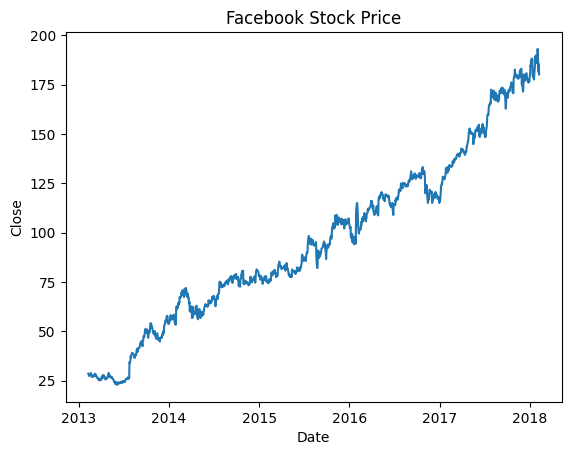

Training Datapoint :  1197
Epoch 1/40


/Users/swayampalrecha/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0702
Epoch 2/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0110
Epoch 3/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0092
Epoch 4/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0098
Epoch 5/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0074
Epoch 6/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0083
Epoch 7/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0078
Epoch 8/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0063
Epoch 9/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0061
Epoch 10/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0052
Epoch 11/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0070
Epoch 12/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0050
Epoch 13/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0062
Epoch 14/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0053
Epoch 15/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0050
Epoch 16/40
36/

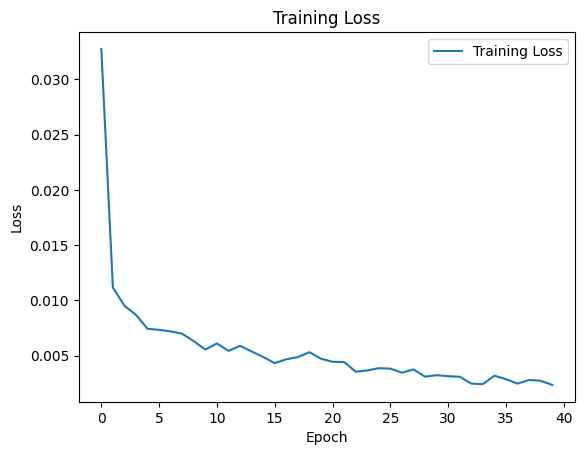

/var/folders/kp/l89ywx516b3blj23_q2zm_p80000gn/T/ipykernel_49047/4045915862.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


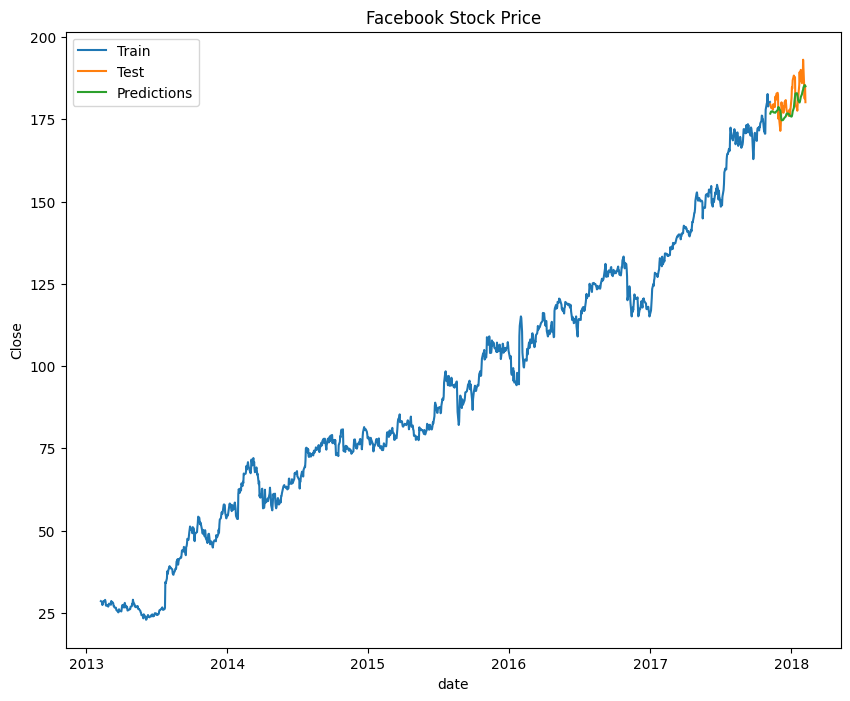

In [45]:
variation_of_companyX_and_predict_thefuturevalue('FB',data,'Facebook Stock Price')

### ADOBE STOCK PRICE

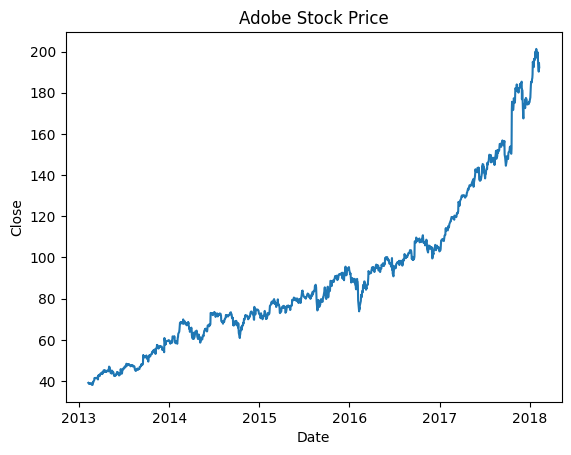

Training Datapoint :  1197
Epoch 1/40


/Users/swayampalrecha/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0324
Epoch 2/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0054
Epoch 3/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0045
Epoch 4/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0051
Epoch 5/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0046
Epoch 6/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0037
Epoch 7/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0033
Epoch 8/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0034
Epoch 9/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0036
Epoch 10/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0034
Epoch 11/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0029
Epoch 12/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0026
Epoch 13/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0028
Epoch 14/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0028
Epoch 15/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0025
Epoch 16/40
36/

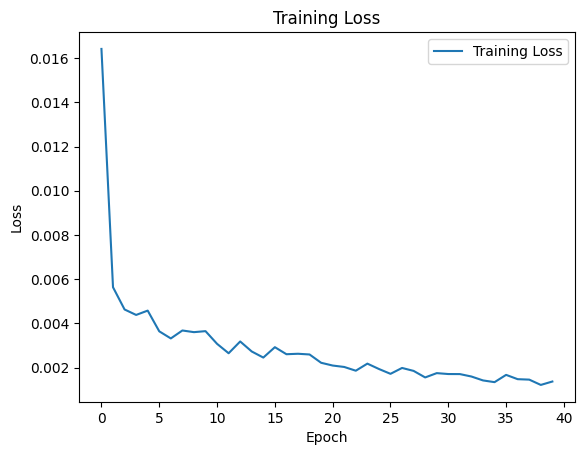

/var/folders/kp/l89ywx516b3blj23_q2zm_p80000gn/T/ipykernel_49047/4045915862.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


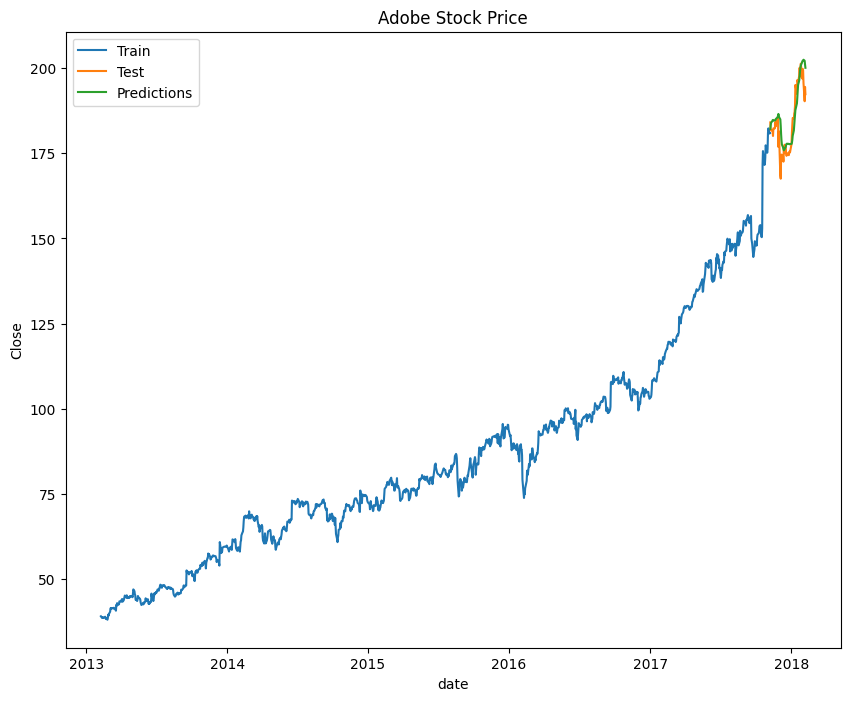

In [48]:
variation_of_companyX_and_predict_thefuturevalue('ADBE',data,'Adobe Stock Price')

### AMERICAN AIRLINES STOCK PRICE

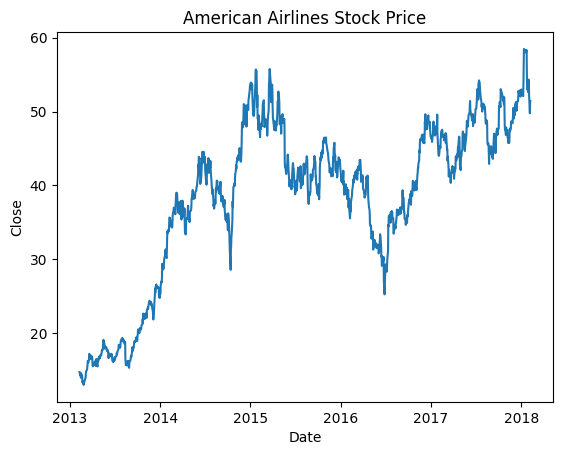

Training Datapoint :  1197
Epoch 1/40


/Users/swayampalrecha/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0906
Epoch 2/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0167
Epoch 3/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0148
Epoch 4/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0136
Epoch 5/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0144
Epoch 6/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0134
Epoch 7/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0120
Epoch 8/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0116
Epoch 9/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0106
Epoch 10/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0114
Epoch 11/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0114
Epoch 12/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0097
Epoch 13/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0090
Epoch 14/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0097
Epoch 15/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087
Epoch 16/40
36/

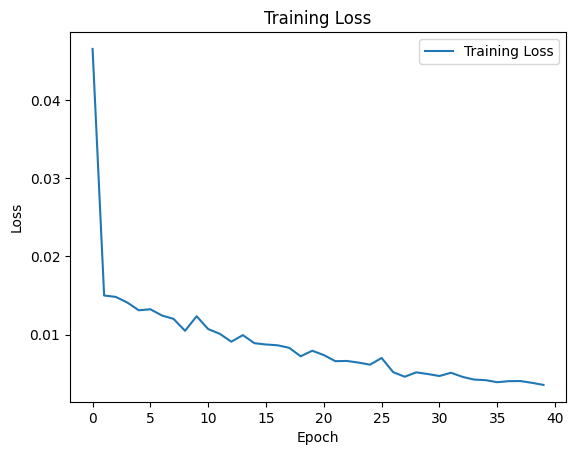

/var/folders/kp/l89ywx516b3blj23_q2zm_p80000gn/T/ipykernel_49047/4045915862.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


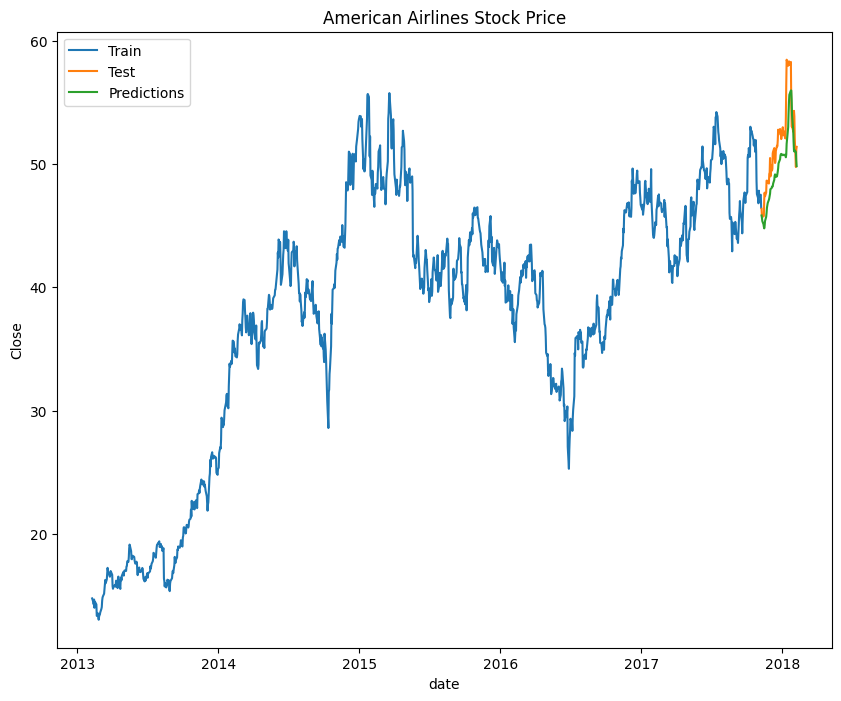

In [50]:
variation_of_companyX_and_predict_thefuturevalue('AAL',data,'American Airlines Stock Price')

### ADVANCE AUTO PARTS

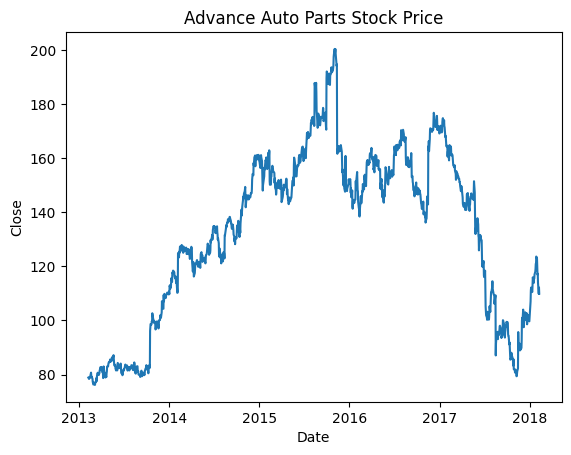

Training Datapoint :  1197
Epoch 1/40


/Users/swayampalrecha/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0824
Epoch 2/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0152
Epoch 3/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0130
Epoch 4/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0115
Epoch 5/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0099
Epoch 6/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0127
Epoch 7/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0105
Epoch 8/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0087
Epoch 9/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0090
Epoch 10/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0086
Epoch 11/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0085
Epoch 12/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0089
Epoch 13/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087
Epoch 14/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0077
Epoch 15/40
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0074
Epoch 16/40
36/

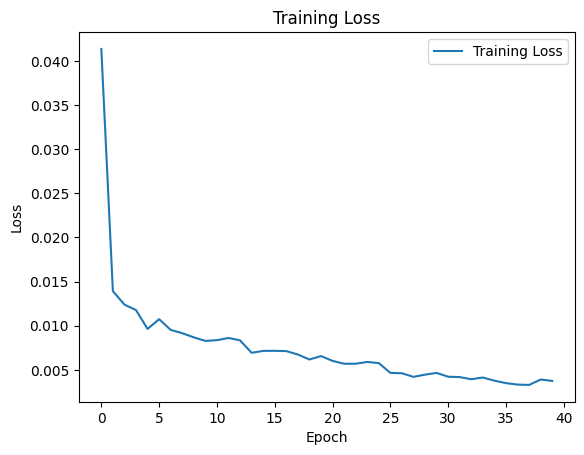

/var/folders/kp/l89ywx516b3blj23_q2zm_p80000gn/T/ipykernel_49047/4045915862.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


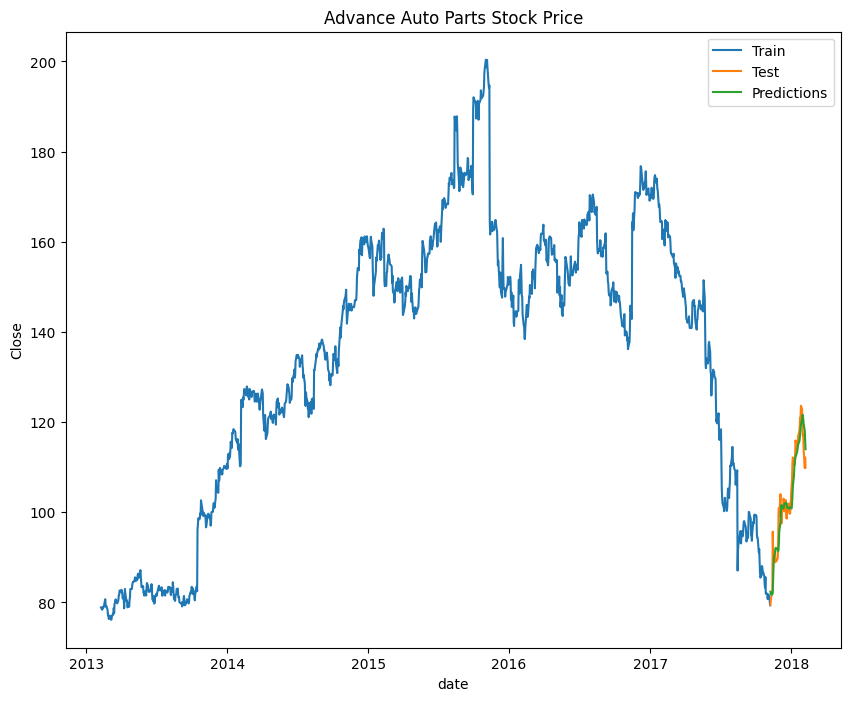

In [51]:
variation_of_companyX_and_predict_thefuturevalue('AAP',data,'Advance Auto Parts Stock Price')

In [ ]:
variation_of_companyX_and_predict_thefuturevalue('ACN',data,'Accenture Stock Price')